In [10]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [11]:
df=pd.read_csv('../preprocessed.csv')
pd.set_option("display.max_columns", None)
df

,Time,TempC,TempF,WindSpeedMiles,WindSpeedKmph,WindDirDegree,WindDir16Point,WeatherDesc,PrecipMM,PrecipInches,Humidity,VisibilityKm,VisibilityMiles,PressureMB,PressureInches,CloudCover,HeatIndexC,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,Date_Month
0,0,20.0,68.0,3,5.0,37.0,11,0,0.0,0.0,47,10,6,1015,30,0.0,20,68,12,54,20.0,68.0,6,10.0,20,68,1
1,100,19.0,67.0,3,4.0,36.0,11,0,0.0,0.0,48,10,6,1015,30,0.0,19,67,12,54,19.0,67.0,8,13.0,19,67,1
2,200,19.0,66.0,2,4.0,35.0,11,0,0.0,0.0,48,10,6,1015,30,0.0,19,66,12,54,19.0,66.0,8,13.0,19,66,1
3,300,18.5,65.0,2,4.0,34.0,6,0,0.0,0.0,48,10,6,1014,30,0.0,18,66,12,53,18.5,65.0,8,13.0,18,66,1
4,400,18.5,65.0,2,4.0,35.0,11,0,0.0,0.0,49,10,6,1015,30,1.0,18,66,12,53,18.5,65.0,8,12.0,18,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,1900,26.0,79.0,4,7.0,303.0,2,0,0.0,0.0,45,10,6,1011,30,0.0,27,80,13,56,26.0,79.0,8,13.0,27,80,12
8785,2000,25.0,78.0,3,4.0,333.0,0,0,0.0,0.0,46,10,6,1012,30,0.0,26,79,13,55,25.0,78.0,5,9.0,26,79,12
8786,2100,25.0,77.0,2,4.0,19.0,6,0,0.0,0.0,47,10,6,1012,30,1.0,26,78,13,55,25.0,77.0,5,7.0,26,78,12
8787,2200,24.0,76.0,2,4.0,41.0,11,0,0.0,0.0,47,10,6,1012,30,2.0,25,78,12,54,24.0,76.0,5,8.0,25,78,12


Precipitation and Humidity -------------->

In [12]:
X=df[['Humidity', 'PrecipMM']]
y=df['CloudCover']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = RandomForestRegressor(n_estimators=100,  
                               max_depth=7,       
                               random_state=42)

model1.fit(X_train, y_train)


RandomForestRegressor(max_depth=7, random_state=42)

In [13]:
y_pred = model1.predict(X_test)

from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error: 248.21799076357982
Mean Absolute Percentage Error (MAPE): inf


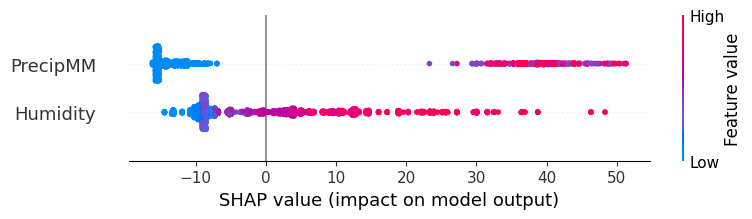

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\plots\_beeswarm.py:612: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  pl.xlim((slow, shigh))
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\plots\_beeswarm.py:631: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  pl.xlim((slow, shigh))


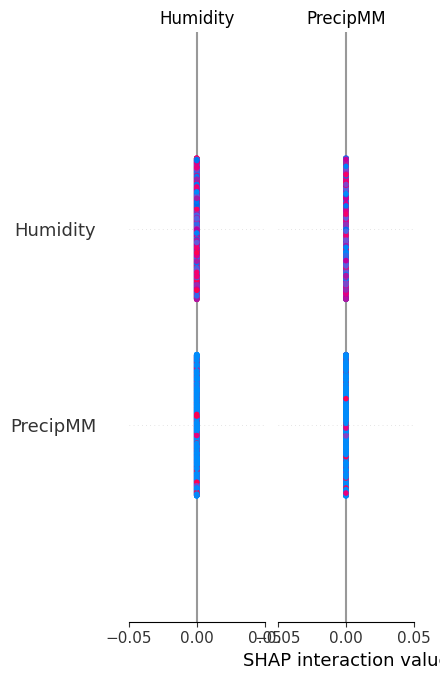

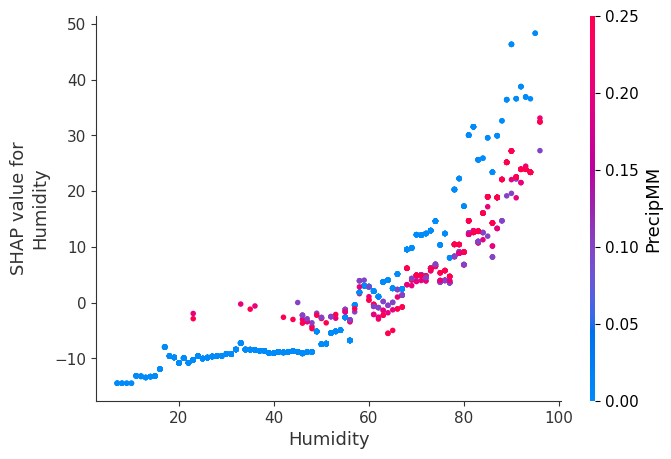

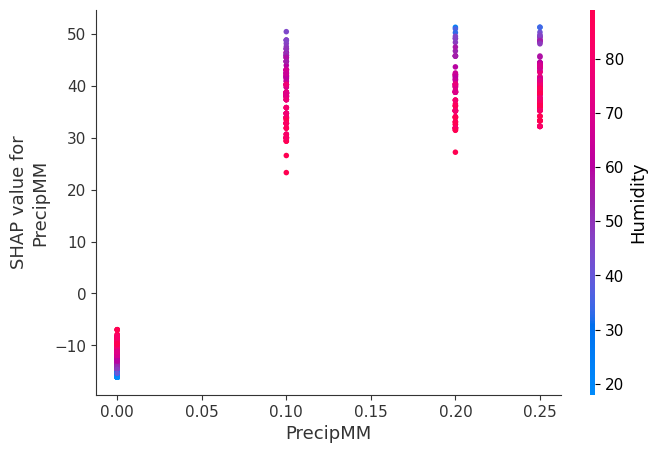

In [14]:
import shap 

explainer = shap.Explainer(model1, X_train)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

shap_interaction_values = explainer.shap_interaction_values(X_test)
shap.summary_plot(shap_interaction_values, X_test, feature_names=X.columns, plot_type='interaction')

shap.dependence_plot('Humidity', shap_values, X_test, feature_names=X.columns)
shap.dependence_plot('PrecipMM', shap_values, X_test, feature_names=X.columns)




With Date_Month ----------->

In [15]:
X=df[['Humidity', 'PrecipMM','Date_Month']]
y=df['CloudCover']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = RandomForestRegressor(n_estimators=100,  
                               max_depth=7,       
                               random_state=42)

model2.fit(X_train, y_train)


RandomForestRegressor(max_depth=7, random_state=42)

In [16]:
y_pred = model2.predict(X_test)

from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error: 187.45935945993173
Mean Absolute Percentage Error (MAPE): inf


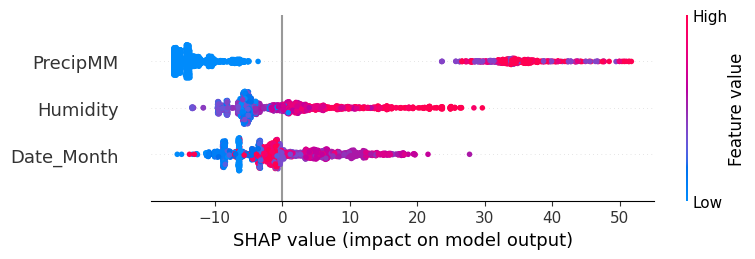

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\plots\_beeswarm.py:612: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  pl.xlim((slow, shigh))
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\plots\_beeswarm.py:631: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  pl.xlim((slow, shigh))
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\plots\_beeswarm.py:631: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  pl.xlim((slow, shigh))


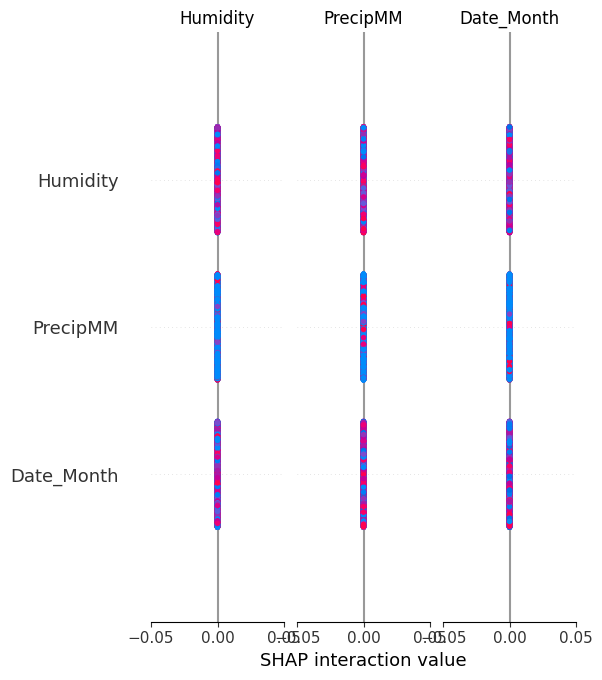

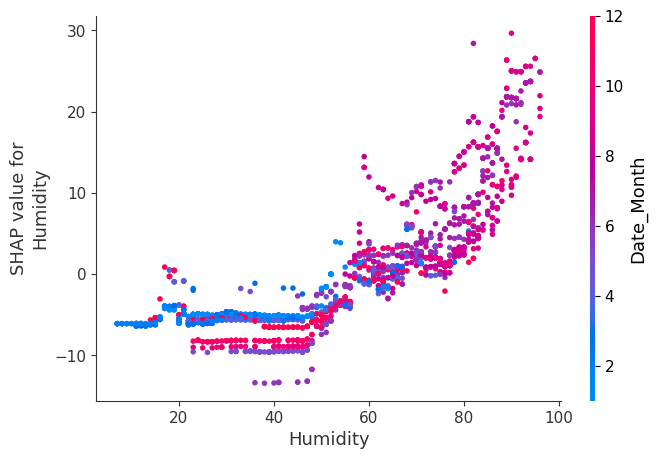

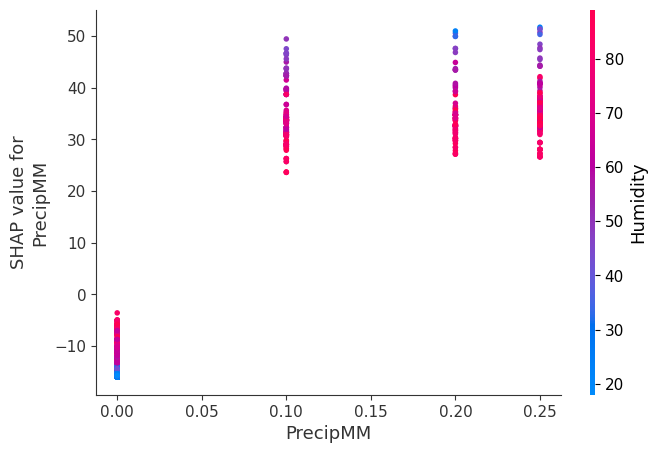

In [17]:
explainer = shap.Explainer(model2, X_train)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

shap_interaction_values = explainer.shap_interaction_values(X_test)
shap.summary_plot(shap_interaction_values, X_test, feature_names=X.columns, plot_type='interaction')

shap.dependence_plot('Humidity', shap_values, X_test, feature_names=X.columns)
shap.dependence_plot('PrecipMM', shap_values, X_test, feature_names=X.columns)

Precipitaion and DewPoint ------------>

In [18]:
X=df[['DewPointC', 'PrecipMM']]
y=df['CloudCover']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model3 = RandomForestRegressor(n_estimators=100,  
                               max_depth=7,       
                               random_state=42)

model3.fit(X_train, y_train)


RandomForestRegressor(max_depth=7, random_state=42)

In [19]:
y_pred = model3.predict(X_test)

from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error: 262.1413241609548
Mean Absolute Percentage Error (MAPE): inf


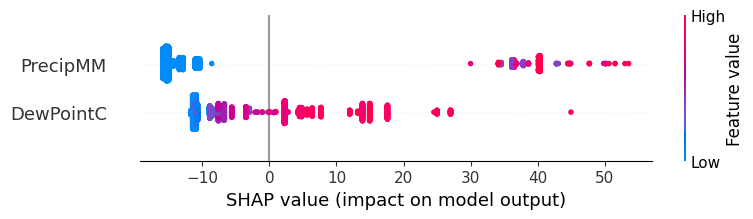

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\plots\_beeswarm.py:612: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  pl.xlim((slow, shigh))
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\plots\_beeswarm.py:631: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  pl.xlim((slow, shigh))


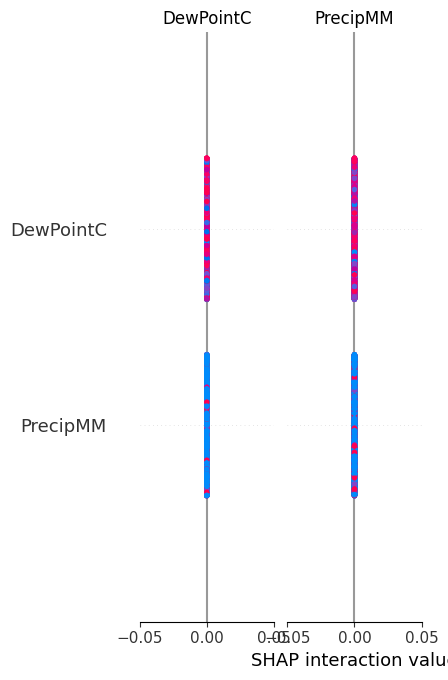

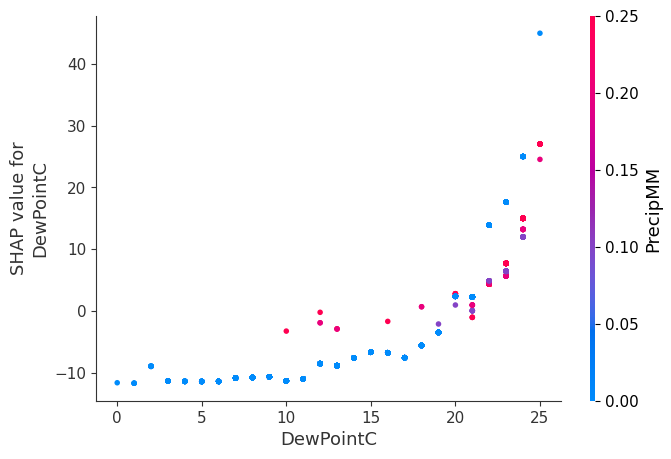

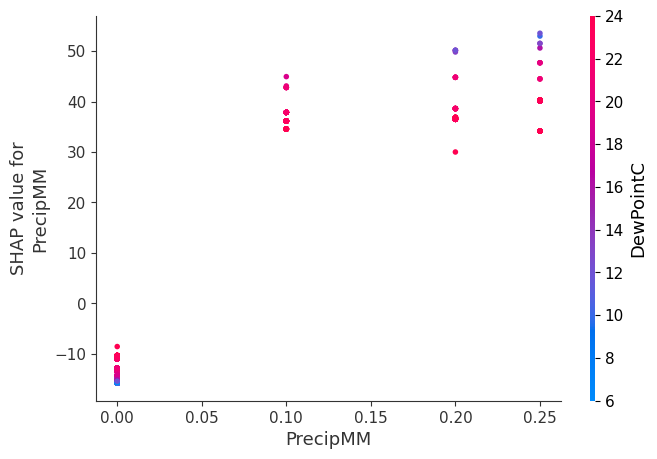

In [20]:
explainer = shap.Explainer(model3, X_train)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

shap_interaction_values = explainer.shap_interaction_values(X_test)
shap.summary_plot(shap_interaction_values, X_test, feature_names=X.columns, plot_type='interaction')

shap.dependence_plot('DewPointC', shap_values, X_test, feature_names=X.columns)
shap.dependence_plot('PrecipMM', shap_values, X_test, feature_names=X.columns)

With Date_Month -------------->

In [9]:
X=df[['DewPointC', 'PrecipMM','Date_Month']]
y=df['CloudCover']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model4 = RandomForestRegressor(n_estimators=100,  
                               max_depth=7,       
                               random_state=42)

model4.fit(X_train, y_train)


RandomForestRegressor(max_depth=7, random_state=42)

In [10]:
y_pred = model4.predict(X_test)

from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error: 203.59854778952024
Mean Absolute Percentage Error (MAPE): inf


In [11]:
import pickle
models_to_save = {
    'cloudcover_model1': model1,
    'cloudcover_model2': model2,
    'cloudcover_model3': model3,
    'cloudcover_model4': model4
}

with open('_cloudcover_rf.pkl', 'wb') as f:
    pickle.dump(models_to_save, f)
